    Prepare a classification model using SVM for salary data 

    Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual


In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib.pyplot as plt

# Import File and EDA

In [2]:
df=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/SalaryData_Train(1).csv')
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(30161, 14)

In [4]:
df["educationno"].value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df['Salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [7]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
print('Shape of dataframe after dropping duplicates',df.shape)

Shape of dataframe after dropping duplicates (26903, 14)


In [11]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']  

encoder=preprocessing.LabelEncoder()
for col in cols:
    
    df[col]=encoder.fit_transform(df[col])


In [12]:
df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


<AxesSubplot:>

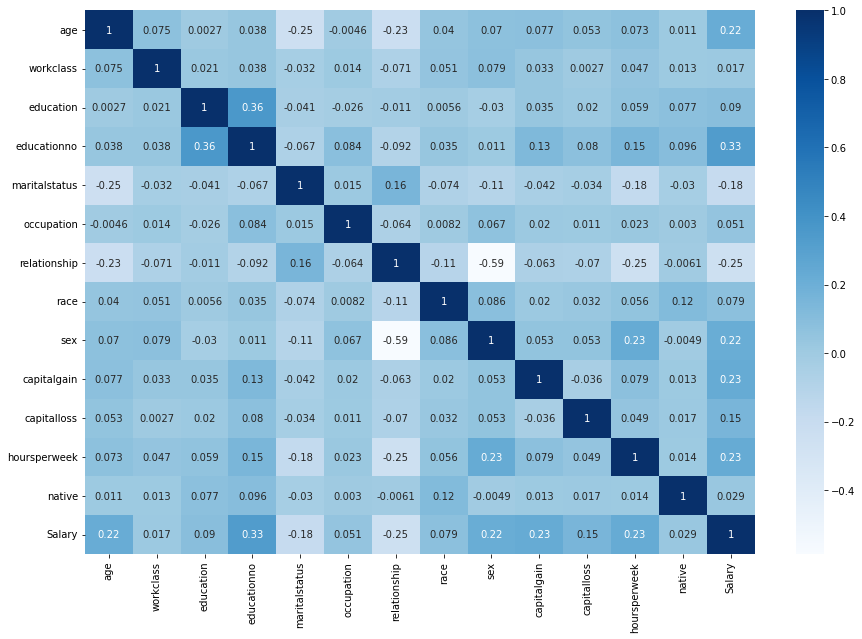

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

    There are few features that doesn't have any contribution towards Salary.

    Lets check this with Randomforest classifier

## Feature selection using RandomForestClassifier

In [14]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X,y)
print(rf.feature_importances_)


[0.21210557 0.04941831 0.03437789 0.09080016 0.06754894 0.08304673
 0.1171809  0.01803842 0.01244061 0.13700621 0.04367497 0.11429753
 0.02006377]


In [16]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [17]:
cols=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
feature_imp=pd.Series(rf.feature_importances_,index=cols).sort_values(ascending=False)
feature_imp

age              0.212106
capitalgain      0.137006
relationship     0.117181
hoursperweek     0.114298
educationno      0.090800
occupation       0.083047
maritalstatus    0.067549
workclass        0.049418
capitalloss      0.043675
education        0.034378
native           0.020064
race             0.018038
sex              0.012441
dtype: float64

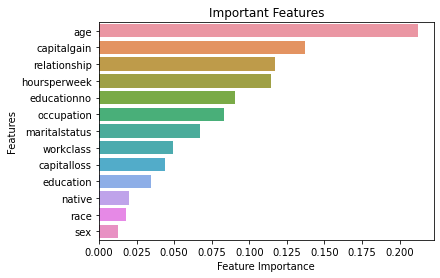

In [18]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()


In [19]:
df1=df.copy()

In [20]:
## Dropping the last 4 columns (educationno is mapped to education so can be dropped too)
df1.drop(['education','native','sex','race'],axis=1,inplace=True)

In [21]:
df1.shape

(26903, 10)

In [22]:
df1.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,39,5,13,4,0,1,2174,0,40,0
1,50,4,13,2,3,0,0,0,13,0
2,38,2,9,0,5,1,0,0,40,0
3,53,2,7,2,5,0,0,0,40,0
4,28,2,13,2,9,5,0,0,40,0


In [23]:
#Scaling the data for normalizaton 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df1[['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']] = scaler.fit_transform(df[['age','workclass','educationno','maritalstatus','occupation','relationship','capitalgain','capitalloss','hoursperweek']])
df1.head()

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,-0.003726,2.791383,1.089919,0.939836,-1.503368,-0.277736,0.122810,-0.23133,-0.094323,0
1,0.830329,1.788156,1.089919,-0.368576,-0.758349,-0.895505,-0.155722,-0.23133,-2.281121,0
2,-0.079549,-0.218299,-0.436737,-1.676988,-0.261669,-0.277736,-0.155722,-0.23133,-0.094323,0
3,1.057799,-0.218299,-1.200065,-0.368576,-0.261669,-0.895505,-0.155722,-0.23133,-0.094323,0
4,-0.837781,-0.218299,1.089919,-0.368576,0.731690,2.193341,-0.155722,-0.23133,-0.094323,0


In [24]:
## Checking output variable
df1['Salary'].value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

### the Data is imabalanced , we will primarily check the precission and recall when checking the scores

## Creating model of SVC

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [26]:
X_train=df1.iloc[:,:-1]
y_train=df1.iloc[:,-1]

In [57]:
y_train.shape

(26903,)

In [27]:
df_test=pd.read_csv('/Users/ayaskantsamal/Documents/EXCELR/assignments/SalaryData_Test(1).csv')

In [28]:
df_test.shape

(15060, 14)

In [29]:
## Dropping the last 4 columns (educationno is mapped to education so can be dropped too)
df_test.drop(['education','native','sex','race'],axis=1,inplace=True)

In [30]:
df_test.shape

(15060, 10)

In [31]:
df.duplicated().value_counts()

False    26903
dtype: int64

In [32]:
df_test

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,0,0,40,<=50K
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,0,0,50,<=50K
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,0,0,40,>50K
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,7688,0,40,>50K
4,34,Private,6,Never-married,Other-service,Not-in-family,0,0,30,<=50K
...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,13,Never-married,Prof-specialty,Own-child,0,0,40,<=50K
15056,39,Private,13,Divorced,Prof-specialty,Not-in-family,0,0,36,<=50K
15057,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,0,0,50,<=50K
15058,44,Private,13,Divorced,Adm-clerical,Own-child,5455,0,40,<=50K


In [33]:
# Label Encoding Categorical Columns

from sklearn import preprocessing

# Making a list of categorical columns
cols=['workclass','maritalstatus','occupation','relationship','Salary']  

encoder=preprocessing.LabelEncoder()
for col in cols:
    
    df_test[col]=encoder.fit_transform(df_test[col])

In [34]:
df_test

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek,Salary
0,25,2,7,4,6,3,0,0,40,0
1,38,2,9,2,4,0,0,0,50,0
2,28,1,12,2,10,0,0,0,40,1
3,44,2,10,2,6,0,7688,0,40,1
4,34,2,6,4,7,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,0,0,40,0
15056,39,2,13,0,9,1,0,0,36,0
15057,38,2,13,2,9,0,0,0,50,0
15058,44,2,13,0,0,3,5455,0,40,0


In [35]:
## Checking output variable
df_test['Salary'].value_counts()

0    11360
1     3700
Name: Salary, dtype: int64

In [36]:
X_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]

In [58]:
y_test.shape

(15060,)

In [37]:
X_test

,age,workclass,educationno,maritalstatus,occupation,relationship,capitalgain,capitalloss,hoursperweek
0,25,2,7,4,6,3,0,0,40
1,38,2,9,2,4,0,0,0,50
2,28,1,12,2,10,0,0,0,40
3,44,2,10,2,6,0,7688,0,40
4,34,2,6,4,7,1,0,0,30
...,...,...,...,...,...,...,...,...,...
15055,33,2,13,4,9,3,0,0,40
15056,39,2,13,0,9,1,0,0,36
15057,38,2,13,2,9,0,0,0,50
15058,44,2,13,0,0,3,5455,0,40


In [38]:
# Defining base model
model1 = SVC()

model1.fit(X_train , y_train)

y_pred_test = model1.predict(X_test)

y_pred_train = model1.predict(X_train)

acc_test = accuracy_score(y_test, y_pred_test) * 100

acc_train = accuracy_score(y_train, y_pred_train) * 100

print("Accuracy Test=", acc_test)

print("Accuracy Train=", acc_train)


Accuracy Test= 75.4316069057105
Accuracy Train= 84.603947515147


In [39]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_test, y_pred_test,target_names=names,zero_division=1))

                 precision    recall  f1-score   support

0-Less than 50K       0.75      1.00      0.86     11360
    1-Above 50K       1.00      0.00      0.00      3700

       accuracy                           0.75     15060
      macro avg       0.88      0.50      0.43     15060
   weighted avg       0.81      0.75      0.65     15060



In [60]:
y_test.shape

(15060,)

In [66]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_pred_train,y_train )
conf_matrix1

array([[18818,  2422],
       [ 1205,  4458]])

In [68]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_train, y_pred_train,target_names=names,zero_division=1))

                 precision    recall  f1-score   support

0-Less than 50K       0.89      0.94      0.91     20023
    1-Above 50K       0.79      0.65      0.71      6880

       accuracy                           0.87     26903
      macro avg       0.84      0.79      0.81     26903
   weighted avg       0.86      0.87      0.86     26903



In [69]:
conf_matrix2=confusion_matrix(y_pred_test,y_test )
conf_matrix2

array([[11360,  3700],
       [    0,     0]])

Text(20.722222222222214, 0.5, 'True Class')

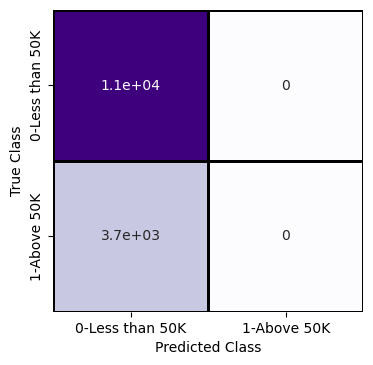

In [41]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix1,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')


+ The precision and recall for label 0 is high which shows that the model has effectively predicted maximum of 0 labels with high accuracy.
+ the precission level for 1 is also correctly predicted


# Using Grid Search CV to find best params 

In [42]:
cv = StratifiedKFold(n_splits=5,shuffle=True)
param_grid = [{'kernel':["rbf"],'gamma':[0.5,0.001,0.0001,0.00001],'C':[1,5,0.1]}]
gsv = GridSearchCV(model1,param_grid,cv=cv,n_jobs = -1, verbose = 2)
gsv.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ...........................C=1, gamma=5, kernel=rbf; total time= 1.6min
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=  21.0s
[CV] END ......................C=1, gamma=0.0001, kernel=rbf; total time=  21.5s
[CV] END .......................C=1, gamma=1e-05, kernel=rbf; total time=  22.2s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=  37.8s
[CV] END .........................C=5, gamma=0.5, kernel=rbf; total time=  34.6s
[CV] END ...........................C=5, gamma=1, kernel=rbf; total time=  53.3s
[CV] END ......................C=5, gamma=0.0001, kernel=rbf; total time=  22.9s
[CV] END ..........................C=10, gamma=5, kernel=rbf; total time= 1.9min
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  21.7s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=  19.6s
[CV] END .....................C=10, gamma=0.000

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 5, 10, 0.1],
                          'gamma': [5, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}],
             verbose=2)

In [43]:
gsv.best_params_ , gsv.best_score_ 

({'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8441811509448431)

In [44]:
# creating model based on above

p=gsv.best_params_

model1 = SVC(kernel=p["kernel"],gamma=p['gamma'],C=p['C'])

model1.fit(X_train , y_train)

y_pred_test = model1.predict(X_test)

y_pred_train = model1.predict(X_train)

acc_test = accuracy_score(y_test, y_pred_test) * 100

acc_train = accuracy_score(y_train, y_pred_train) * 100

print("Accuracy Test=", acc_test)

print("Accuracy Train=", acc_train)

Accuracy Test= 75.4316069057105
Accuracy Train= 86.51823216741627


In [51]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_test, y_pred_test,target_names=names,zero_division=1))

                 precision    recall  f1-score   support

0-Less than 50K       0.75      1.00      0.86     11360
    1-Above 50K       1.00      0.00      0.00      3700

       accuracy                           0.75     15060
      macro avg       0.88      0.50      0.43     15060
   weighted avg       0.81      0.75      0.65     15060



In [52]:
from sklearn.metrics import classification_report
names=['0-Less than 50K','1-Above 50K']
print(classification_report(y_train, y_pred_train,target_names=names,zero_division=1))

                 precision    recall  f1-score   support

0-Less than 50K       0.89      0.94      0.91     20023
    1-Above 50K       0.79      0.65      0.71      6880

       accuracy                           0.87     26903
      macro avg       0.84      0.79      0.81     26903
   weighted avg       0.86      0.87      0.86     26903



In [75]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix_train=confusion_matrix( y_pred_train,y_train)
conf_matrix_train

array([[18818,  2422],
       [ 1205,  4458]])

In [76]:
conf_matrix2=confusion_matrix( y_pred_test,y_test)
conf_matrix2

array([[11360,  3700],
       [    0,     0]])

Text(20.722222222222214, 0.5, 'True Class')

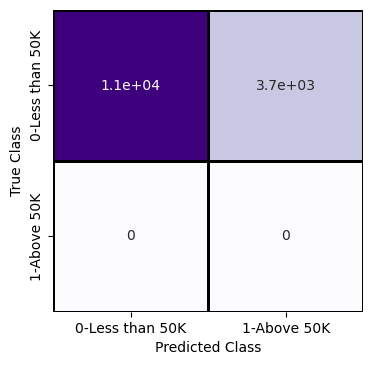

In [77]:
fig, ax= plt.subplots(1,1, figsize=(4,4),dpi=100)

xlabels=['0-Less than 50K','1-Above 50K']
ylabels=['0-Less than 50K','1-Above 50K']

sns.heatmap(conf_matrix2,annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax.set_xlabel('Predicted Class')
ax.set_ylabel('True Class')

